# 1. 데이터불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Assignment_data.csv',encoding ='utf-8')

# 2. 데이터 

이용할 데이터는 case.scv(Data of COVID-19 infection cases in South Korea) + Region.csv(Location and statistical data of the regions in South Korea)<br><br>
case_id : the ID of the infection case <br>
province_x : Special City / Metropolitan City / Province(-do)<br>
city : City(-si) / Country (-gun) / District (-gu)<br>
group : TRUE: group infection / FALSE: not group<br>
infection_case : the infection case (the name of group or other cases)<br>
confirmed: the accumulated number of the confirmed<br>
latitude_x, longitude_x : the latitude of the group (WGS84), the longitude of the group (WGS84)<br>
elementary_school_count	: the number of elementary schools<br>
kindergarten_count : the number of kindergartens<br>
university_count : the number of universities<br>
academy_ratio : the ratio of academies<br>
elderly_population_ratio : he ratio of the elderly population<br>
elderly_alone_ratio : <br>
nursing_home_count : <br>

### 2-1) Describe

In [2]:
#상위데이터 10개확인
df.head(10)

,case_id,province_x,city,group,infection_case,confirmed,latitude_x,longitude_x,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121,22,33,1,0.89,15.12,4.9,909
3,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387,26,34,3,1.00,16.21,5.7,741
4,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343,26,34,3,1.00,16.21,5.7,741
5,1000035,Seoul,Guro-gu,True,Daezayeon Korea,3,37.486837,126.893163,26,34,3,1.00,16.21,5.7,741
6,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209,30,43,0,2.26,13.55,5.5,816
7,1000026,Seoul,Yangcheon-gu,True,Biblical Language study meeting,3,37.524623,126.843118,30,43,0,2.26,13.55,5.5,816
8,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374,23,26,1,0.95,17.89,7.2,485
9,1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766,21,31,4,1.06,17.26,6.7,832


In [3]:
# 데이터의 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 case_id                    117 non-null int64
province_x                  117 non-null object
city                        117 non-null object
group                       117 non-null bool
infection_case              117 non-null object
confirmed                   117 non-null int64
latitude_x                  117 non-null object
longitude_x                 117 non-null object
elementary_school_count     117 non-null int64
kindergarten_count          117 non-null int64
university_count            117 non-null int64
academy_ratio               117 non-null float64
elderly_population_ratio    117 non-null float64
elderly_alone_ratio         117 non-null float64
nursing_home_count          117 non-null int64
dtypes: bool(1), float64(3), int64(6), object(5)
memory usage: 13.0+ KB


latitude_x, longitude_x의 형태가 obeject여서 의문을 가지고 일단 결측값 확인으로 넘어간다.

### 2-2) Data Pre-processing

#### 결측치 확인

In [4]:
df.isnull().sum()

 case_id                    0
province_x                  0
city                        0
group                       0
infection_case              0
confirmed                   0
latitude_x                  0
longitude_x                 0
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

* 결측치가 없다고 나오지만 latitude_x, longitude_x의 형태에 의문이 생겨 원데이터 확인결과, null값은 없지만 '-'표시 되어있는게 몇개 있어서 처음부터 데이터를 df로 불러올때 '-'를 na값으로 인식할 수 있도록 na_values를 추가하였다.

In [5]:
df = pd.read_csv('Assignment_data.csv',encoding ='utf-8', na_values=['-'])

In [6]:
#latitude_x, longitude_x의 결측치 인식이 제대로 된 것을 확인할 수 있다.
df.isnull().sum()

 case_id                    0
province_x                  0
city                        0
group                       0
infection_case              0
confirmed                   0
latitude_x                  5
longitude_x                 5
elementary_school_count     0
kindergarten_count          0
university_count            0
academy_ratio               0
elderly_population_ratio    0
elderly_alone_ratio         0
nursing_home_count          0
dtype: int64

* 결측치 처리 : latitude_x, longitude_x가 유용하게 쓰일것 같지 않아 해당변수를 제거하였다. group변수도 TRUE로 동일하기 때문에 제거한다

In [7]:
df.dropna(axis=1,inplace=True)

In [8]:
df = df.drop('group',axis=1)

In [9]:
#변수가 잘 제거되었는지 확인
df.head(3)

,case_id,province_x,city,infection_case,confirmed,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000001,Seoul,Yongsan-gu,Itaewon Clubs,139,15,13,1,0.68,16.87,6.5,435
1,1000002,Seoul,Gwanak-gu,Richway,119,22,33,1,0.89,15.12,4.9,909
2,1000010,Seoul,Gwanak-gu,Wangsung Church,30,22,33,1,0.89,15.12,4.9,909


### 2-3) 연속형 변수간의 상관관계를 Heatmap과 Pair Plot을 이용, corr수치를 통해 상관관계를 확인 및 설명.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

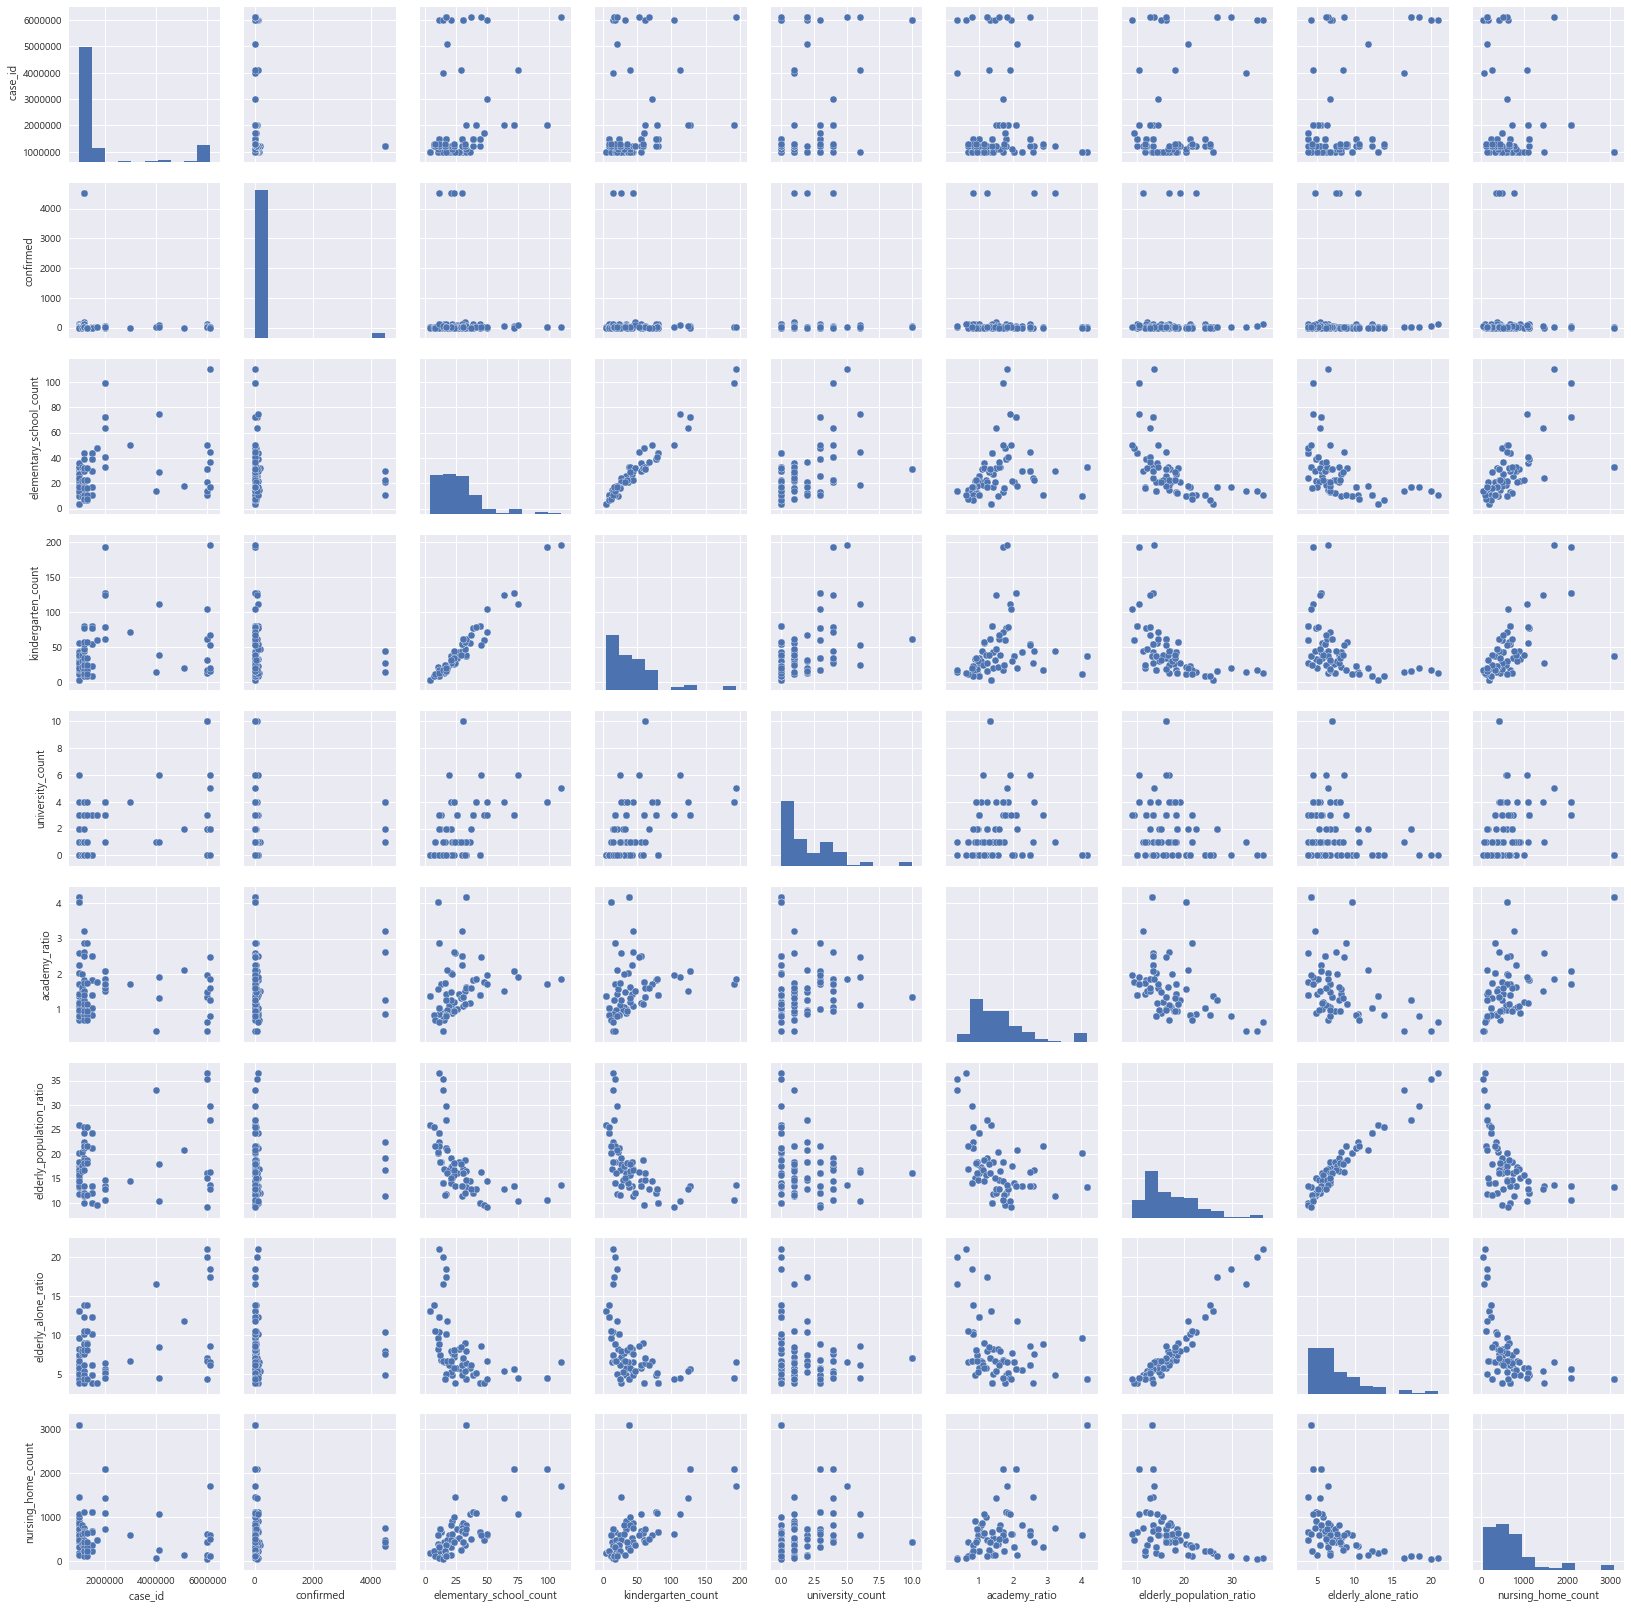

In [12]:
sns.pairplot(df)
plt.show()

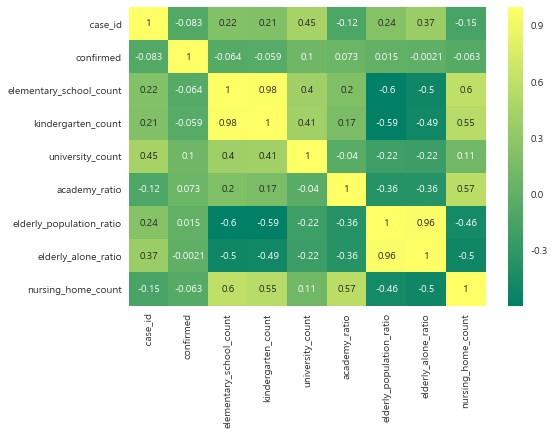

In [13]:
sns.heatmap(df.corr(),cmap='summer',annot=True)
plt.show()

* confirmed의 극단치를 해결해야할 것 같다.
* 'elementary_school_count' 와 'kindergarten_count'가 큰 관련이 있는 것으로 나온다.
* 'elderly_population_ratio' 와 'elderly_alone_ratio'도 관련있는 것으로 나온다. 
* 위 그래프들을 참고하여 시각화를 진행할 것이다.

### 2-4) 시각화 10개이상, Feature5개이상 생성

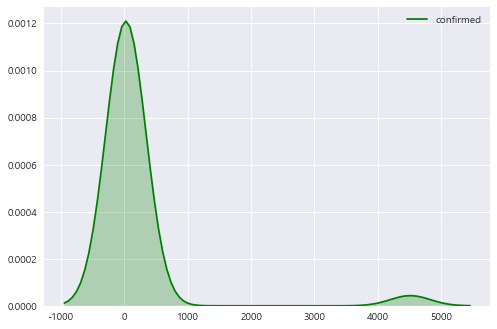

In [14]:
#confirmed의 극단치 확인을 위해 시각화를 진행한다.
sns.kdeplot(df['confirmed'], shade=True, color="g")

* 4000이상되는 극단값들이 있어 제거를 해준다. 

In [15]:
df = df[df['confirmed']<1000]

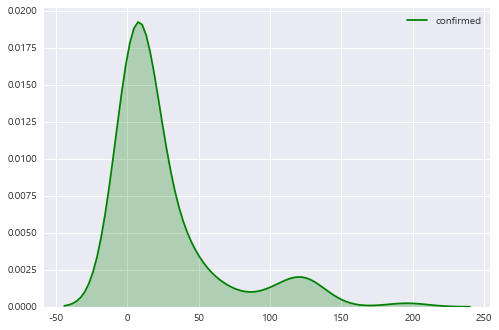

In [16]:
sns.kdeplot(df['confirmed'], shade=True, color="g")

* 극단값을 제거했음에도 그래프가 왼쪽으로 치우친 모습이다. 

* 로그변환을 통해 정규분포에 가까워질 수 있도록 만들어본다. 

In [17]:
df["log_confirmed"]=np.log1p(df["confirmed"])

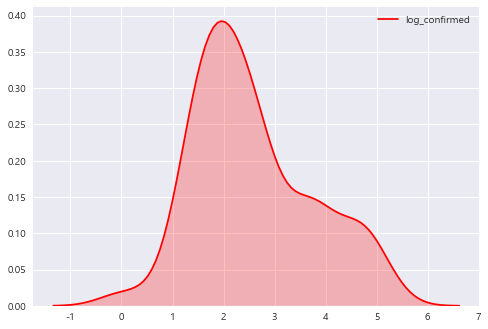

In [18]:
sns.kdeplot(df["log_confirmed"], shade=True, color="r")

* 로그변환을 통해 전보다 정규분포에 가까워진것을 확인 할 수 있다.

* violin plot도 한번 그려보았다. 

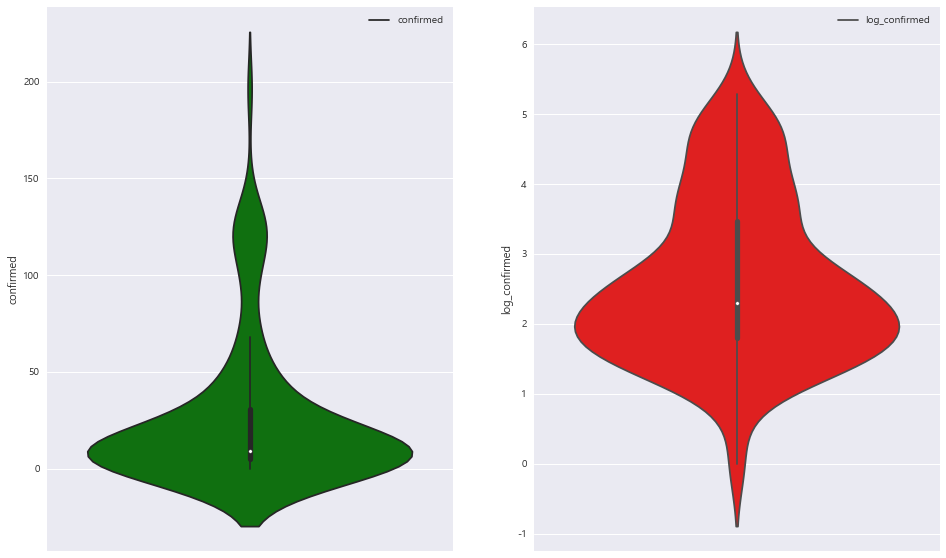

In [19]:
a,b = plt.subplots(1,2, sharex=True, sharey=True,figsize=(16,10))

#confirmed 그래프 
b[0] = plt.subplot(1,2,1)
b[0] = sns.violinplot( y='confirmed', data=df,color='g')
b[0].legend(['confirmed'])

# log변환한 confirmed 그래프 
b[1] = plt.subplot(1,2,2)
b[1] = sns.violinplot( y='log_confirmed', data=df,color='r')
b[1].legend(['log_confirmed'])

plt.show()

* "confirmed"에 로그를 취한 "log_confirmed"라는 새로운 Feature를 생성하였다. 

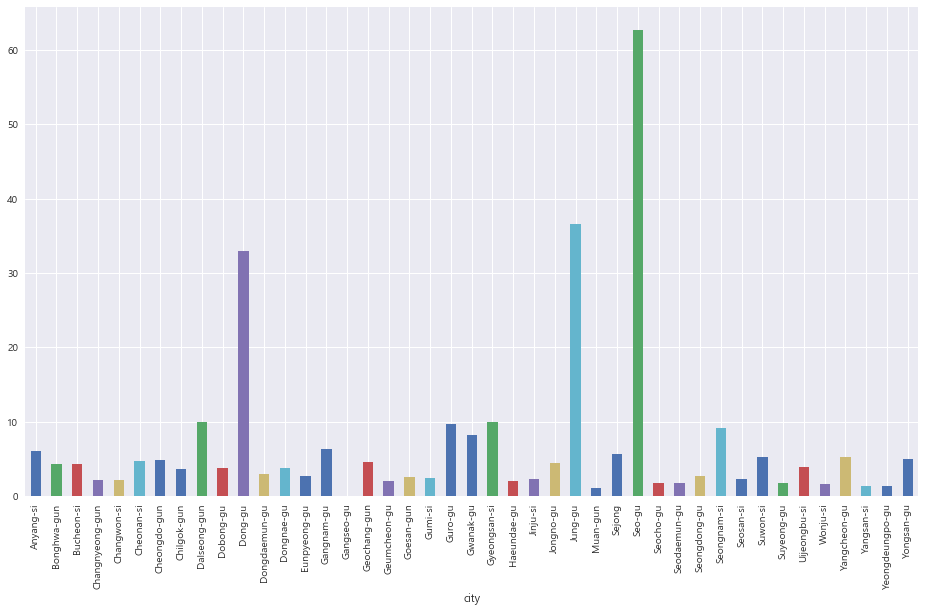

In [20]:
#도시별로 확진자 분포 확인
#서구에 가장 많은 확진자가 있음을 알 수 있다. 
df.groupby(["city"])["log_confirmed"].sum().plot.bar(figsize=(16,9))

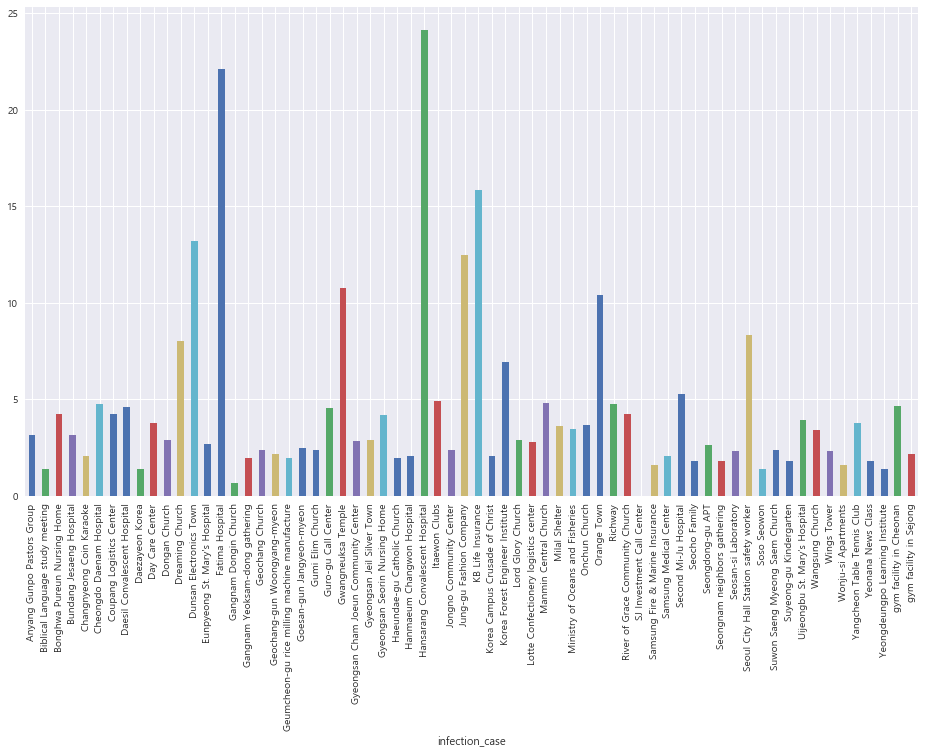

In [21]:
#감염케이스별 확진자 확인
#'Hansarang Convalescent Hospital'가 제일 많고 'Fatima Hospital', 'Dunsan Electronics Town' 순으로 많다. 
df.groupby(["infection_case"])["log_confirmed"].sum().plot.bar(figsize=(16,9))

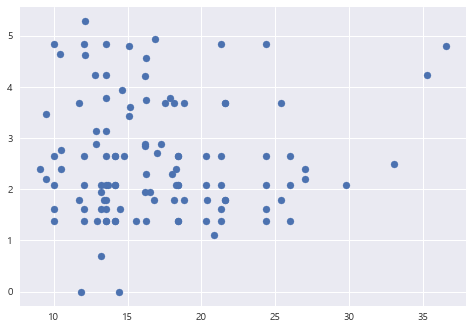

In [22]:
#노인비율이 높을수록 확진자가 많을 것이라 생각되어 그래프를 그려보았다. 연관성이 많아 보이진 않는다 
plt.scatter(x=df['elderly_population_ratio'], y=df['log_confirmed'])
plt.show()

* 'elderly_population_ratio'가 비율을 나타내는데, 범위의 뜻을 알기가 어려워서 MinMaxScaler를 이용하여 최솟값이0, 최댓값이 1로 나오도록 만들어 볼 생각이다. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

X=df["elderly_population_ratio"] 
X= X.reshape((-1,1))
scaler = MinMaxScaler()
scaler.fit(X)             
X_scaled = scaler.transform(X) 

X_scaled

C:\Users\Cute\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[0.28358209],
       [0.21987623],
       [0.21987623],
       [0.25955588],
       [0.25955588],
       [0.25955588],
       [0.16272297],
       [0.16272297],
       [0.32071351],
       [0.2977794 ],
       [0.28831452],
       [0.20677102],
       [0.33454678],
       [0.33454678],
       [0.1488897 ],
       [0.1488897 ],
       [0.1488897 ],
       [0.1488897 ],
       [0.34000728],
       [0.61594467],
       [0.40808154],
       [0.18420095],
       [0.33891518],
       [0.18456498],
       [0.34000728],
       [0.61594467],
       [0.40808154],
       [0.18420095],
       [0.33891518],
       [0.18456498],
       [0.34000728],
       [0.61594467],
       [0.40808154],
       [0.18420095],
       [0.33891518],
       [0.18456498],
       [0.27994175],
       [0.25737168],
       [0.23734984],
       [0.15689843],
       [0.19330178],
       [0.10047324],
       [0.3076083 ],
       [0.41208591],
       [0.27120495],
       [0.11030215],
       [0.11030215],
       [0.556

In [24]:
df["scaled_epr"]=X_scaled

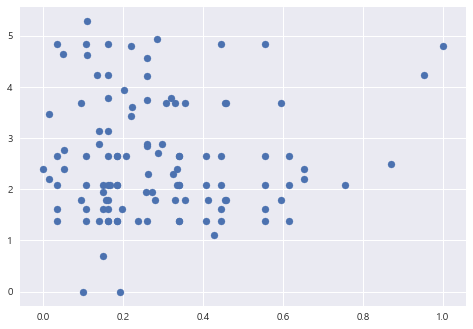

In [25]:
plt.scatter(x=df['scaled_epr'], y=df['log_confirmed'])
plt.show()

* 노인인구비율이 0부터 1사이로 맞춰진것을 확인할 수 있다. 이로써 새로운 Feature인 "scaled_epr(elderly_population_ratio)"가 생성되었다.

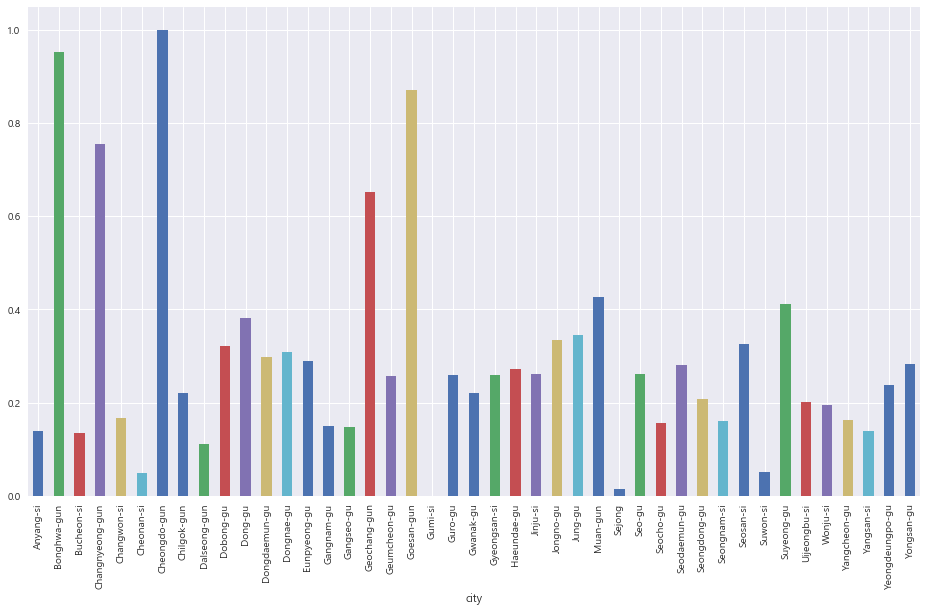

In [26]:
#서구가 노인인구비율 평균이 제일 높은것을 알 수 있다, 
df.groupby(["city"])["scaled_epr"].mean().plot.bar(figsize=(16,9))

* 마찬가지로 "elderly_alone_ratio"도  MinMaxScaler를 이용하여 Scaling해준다.

In [27]:
from sklearn.preprocessing import MinMaxScaler

Y=df["elderly_alone_ratio"] 
Y= Y.reshape((-1,1))
scaler = MinMaxScaler() 
scaler.fit(Y)            
Y_scaled = scaler.transform(Y) 

Y_scaled

C:\Users\Cute\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[0.15697674],
       [0.06395349],
       [0.06395349],
       [0.11046512],
       [0.11046512],
       [0.11046512],
       [0.09883721],
       [0.09883721],
       [0.19767442],
       [0.16860465],
       [0.15697674],
       [0.0872093 ],
       [0.1744186 ],
       [0.1744186 ],
       [0.02906977],
       [0.02906977],
       [0.02906977],
       [0.02906977],
       [0.20930233],
       [0.53488372],
       [0.3372093 ],
       [0.16860465],
       [0.25581395],
       [0.15697674],
       [0.20930233],
       [0.53488372],
       [0.3372093 ],
       [0.16860465],
       [0.25581395],
       [0.15697674],
       [0.20930233],
       [0.53488372],
       [0.3372093 ],
       [0.16860465],
       [0.25581395],
       [0.15697674],
       [0.13953488],
       [0.16860465],
       [0.11627907],
       [0.        ],
       [0.11046512],
       [0.06976744],
       [0.22674419],
       [0.25581395],
       [0.23837209],
       [0.09302326],
       [0.09302326],
       [0.494

In [28]:
df["scaled_ear"]=Y_scaled

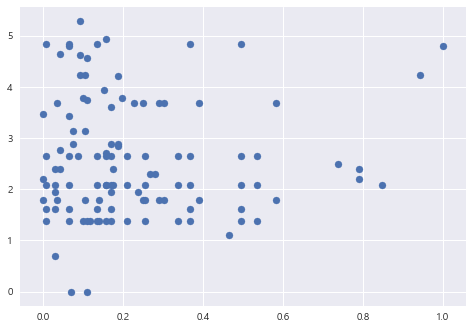

In [29]:
plt.scatter(x=df['scaled_ear'], y=df['log_confirmed'])
plt.show()

* 새로운 Feature인 'scaled_ear(elderly_alone_ratio)'가 생성되었다. 

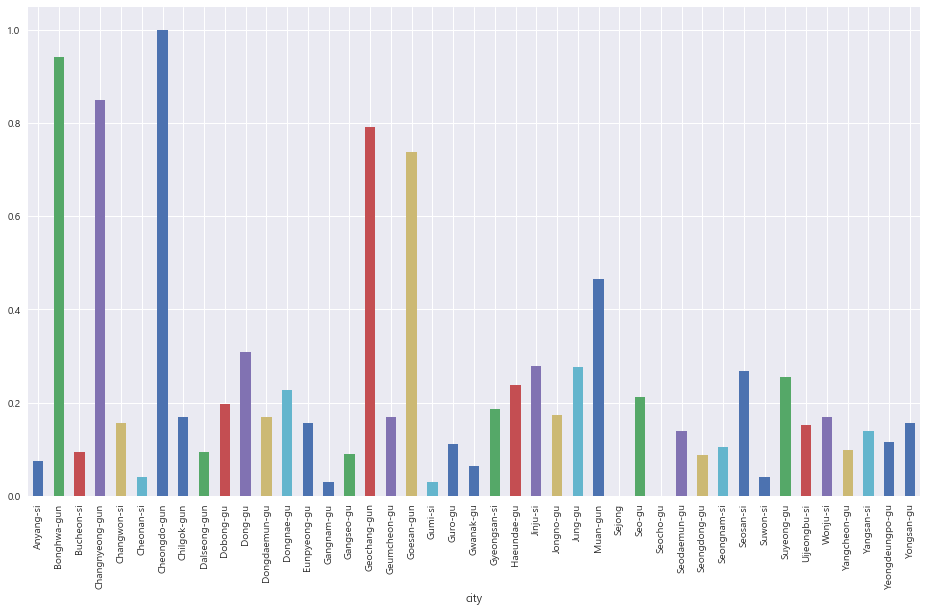

In [30]:
#도시별 독거노인 비율을 그려보았는데, 노인인구비율이 높은쪽에 독거노인비율도 높겠구나 예상했지만 완벽히 일치하는 것은 아니었다. 
df.groupby(["city"])["scaled_ear"].mean().plot.bar(figsize=(16,9))

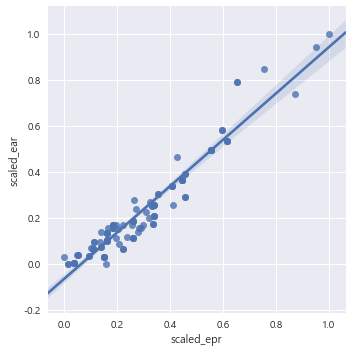

In [31]:
#그래서 scaled_epr와 scaled_ear 그려보았다. 어느정도 연관성은 있어보이는 것 같다. 
sns.lmplot(x="scaled_epr", y="scaled_ear", data=df)

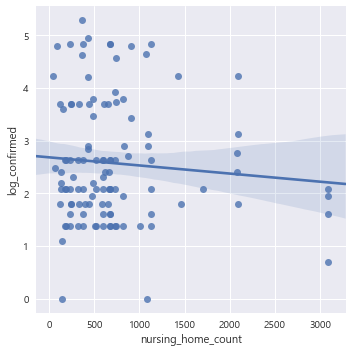

In [32]:
#nursing_home이 많을 수록 확진자가 많이 나올것 같아 그래프를 그려보았는데 별로 관계가 없어보인다. 
sns.lmplot(x="nursing_home_count", y="log_confirmed", data=df)

* 여기서 "nursing_home_count" 분포만을 따로 그려보았을때, 로그변환이 필요해보여 로그변환을 진행하였다. 

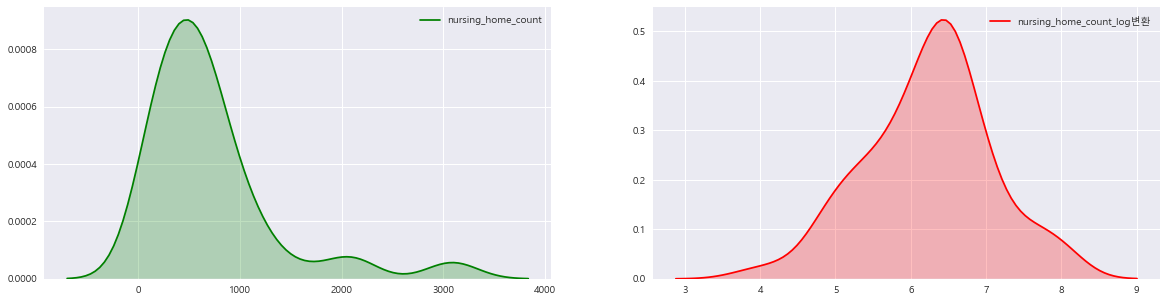

In [33]:
a,b = plt.subplots(1,2, sharex=True, sharey=True,figsize=(20,5))

#nursing_home_count 그레프 
b[0] = plt.subplot(1,2,1)
b[0] = sns.kdeplot(df['nursing_home_count'], shade=True, color="g")
b[0].legend(['nursing_home_count'])

# log변환한 nursing_home_count 그레프 
b[1] = plt.subplot(1,2,2)
b[1] = sns.kdeplot(df['nursing_home_count'].transform(np.log), shade=True, color="r")
b[1].legend(['nursing_home_count_log변환'])

plt.show()

* 로그변환을 통해 전보다 정규분포에 가까워진것을 확인 할 수 있다.

* "nursing_home_count"에 로그를 취한 "log_nhc(nursing_home_count)"라는 새로운 Feature를 생성하였다.

In [34]:
df["log_nhc"]=df['nursing_home_count'].transform(np.log)

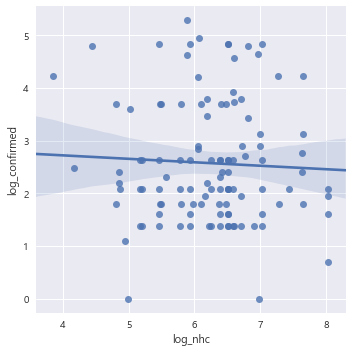

In [35]:
#위의 그래프를 다시그려보았다. 
sns.lmplot(x="log_nhc", y="log_confirmed", data=df)

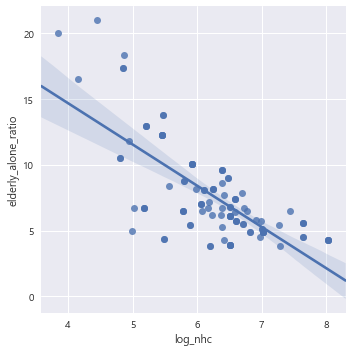

In [36]:
#nursing_home_count와 elderly_alone_ratio는 양의 관계를 가질줄 알았는데 음의 관계를 가지는것을 그래프로 확인해볼 수 있다. 
sns.lmplot(x="log_nhc", y="elderly_alone_ratio", data=df)

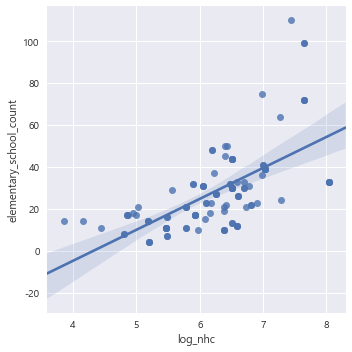

In [37]:
#nursing_home_count와 academy_ratio의 상관계수가 0.6으로 다른것들에 비해 조금 높게나와 그래프를 그려보았다. 
sns.lmplot(x="log_nhc", y="elementary_school_count", data=df)

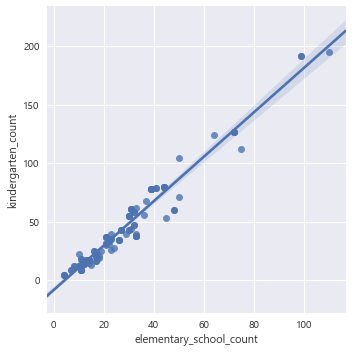

In [38]:
#상관계수가 0.98로 가장 높게나온 elementary_school_count와 kindergarten_count를 그려본다
sns.lmplot(x="elementary_school_count", y="kindergarten_count", data=df)

* elementary_school_count와 kindergarten_count가 상관관계가 높아 차라리 두개를 합쳐서 새로운 Feature인 "e_k_count"를 생성하였다. 

In [39]:
df["e_k_count"] = df["elementary_school_count"]+df["kindergarten_count"]

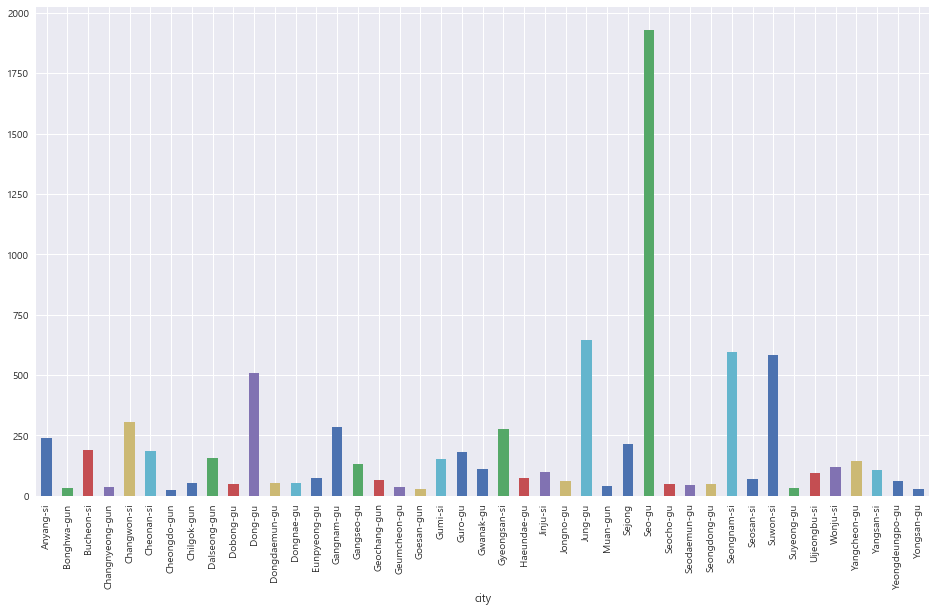

In [40]:
#e_k_count도 많고 '도시별로 확진자 분포 확인'그래프에서 확진자 또한 많이 나온 지역이 서구이다. 
df.groupby(["city"])["e_k_count"].sum().plot.bar(figsize=(16,9))

### 생성한 Feature를 정리하면 다음과 같다.  
1. confirmed를 로그변환 시킨 log_confirmed
2. nursing_home_count를 로그변환 시킨 log_nhc
3. elementary_school_count와 kindergarten_count를 합친 e_k_count
4. elderly_population_ratiof를 스케일링한 scaled_epr
5. elderly_alone_ratio를 스케일링한 scaled_ear